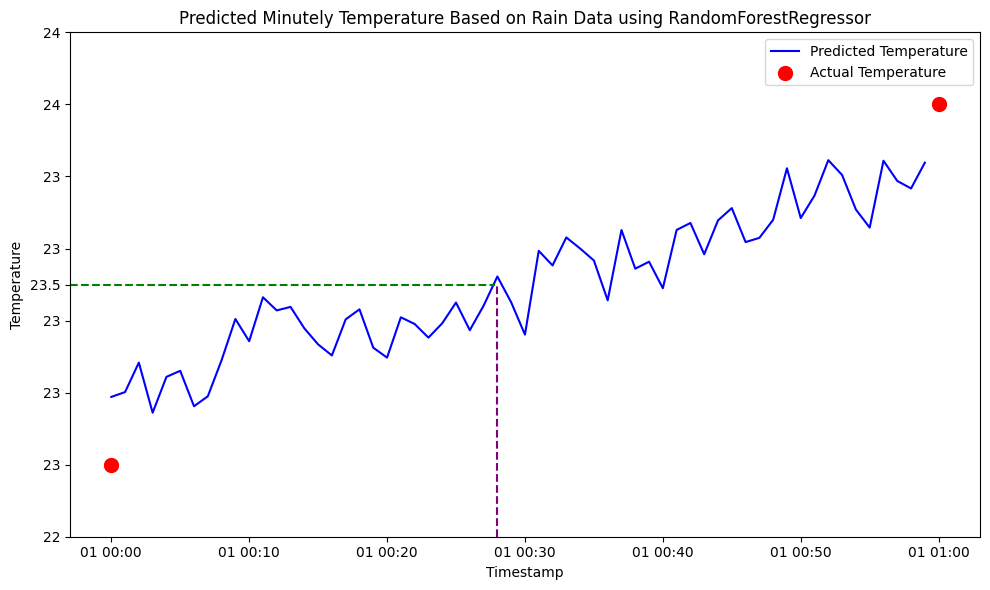

The median temperature of 23.5°C is first reached at: 2023-01-01 00:28:00


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Sample data
hourly_temp = pd.DataFrame({
    'timestamp': ["2023-01-01 00:00", "2023-01-01 01:00"],
    'temperature': [23, 24]
})
hourly_temp['timestamp'] = pd.to_datetime(hourly_temp['timestamp'])
hourly_temp.set_index('timestamp', inplace=True)

minutely_rain = pd.DataFrame({
    'timestamp': pd.date_range(start="2023-01-01 00:00", periods=60, freq='T'),
    'rain': np.random.random(60)
})
minutely_rain['timestamp'] = pd.to_datetime(minutely_rain['timestamp'])

# Initial guess for temperature using linear interpolation
minutely_temp = hourly_temp.resample('T').interpolate(method='linear').reset_index()

X = minutely_rain[['rain']]
y = minutely_temp['temperature'][:-1]

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict the minutely temperatures based on rain data
predicted_temps = model.predict(X)

median_temp_reached_index = np.where(predicted_temps >= 23.5)[0][0]
median_temp_reached_timestamp = minutely_rain.iloc[median_temp_reached_index]['timestamp']

# ... [previous setup code]

# Plotting
plt.figure(figsize=(10,6))
plt.plot(minutely_rain['timestamp'], predicted_temps, label="Predicted Temperature", color='blue')
plt.scatter(hourly_temp.index, hourly_temp['temperature'], color='red', label="Actual Temperature", s=100)

# Adjusting the y-ticks to include 23.5°C specifically
yticks = plt.gca().get_yticks()
yticks = np.append(yticks, 23.5)
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([str(int(ytick)) if ytick != 23.5 else '23.5' for ytick in yticks])

# Adjusting the x-ticks to include the specific minute when 23.5°C is reached
xticks = plt.gca().get_xticks()
xticks = np.append(xticks, median_temp_reached_timestamp)
#plt.gca().set_xticks(xticks)
#plt.gca().set_xticklabels([xtick.strftime('%H:%M') if xtick != median_temp_reached_timestamp else median_temp_reached_timestamp.strftime('%H:%M') for xtick in xticks], rotation=45)

# Compute fractions for line lengths
y_fraction = (23.5 - hourly_temp.iloc[0]['temperature']) / (hourly_temp.iloc[1]['temperature'] - hourly_temp.iloc[0]['temperature'])
x_fraction = (median_temp_reached_timestamp - minutely_rain.iloc[0]['timestamp']).seconds / 3600

# Adding the limited horizontal and vertical lines
plt.axhline(y=23.5, xmin=0, xmax=x_fraction, color='green', linestyle='--')
plt.axvline(x=median_temp_reached_timestamp, ymin=0, ymax=y_fraction, color='purple', linestyle='--')

plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.title("Predicted Minutely Temperature Based on Rain Data using RandomForestRegressor")
plt.legend()
plt.tight_layout()
plt.show()

print(f"The median temperature of 23.5°C is first reached at: {median_temp_reached_timestamp}")
